# BW \#79 Cyber attacks
How often do cyber attacks take place? Who initiates them, who is targeted by them and have they been increasing over time? 

## Data and six questions
The data comes from the stock market

The data comes from the Center for International and Security Studies at the University of Maryland. They have a database of cyber attacks dating back to 2014. You can download it from here:

Click on the link "publication file" on the right side of the screen, and you'll get an Excel file containing their database.

## Challenges
The learning goals include working with dates and times, grouping, pivot tables, plotting, and string methods.
- Read the data into an Excel file. Make sure that the event_date column into a datetime dtype.
- Create a line plot showing the number of incidents in each month. Has the number of incidents grown consistently over time?



In [1]:
import pandas as pd

In [2]:
filename = r"C:\Users\npigeon\Git\BW #79 Cyber attacks\umspp-export-2024-08-26.xlsx"

In [20]:
df = pd.read_excel(filename,
                   sheet_name = 0,
                   parse_dates=['event_date'] # = 1
                   #date_format={'event_date' :'%Y-%m-%d'}
                   )

In [21]:
df.dtypes

slug             object
event_date       object
year              int64
month             int64
actor            object
actor_type       object
organization     object
industry_code     int64
industry         object
motive           object
event_type       object
event_subtype    object
description      object
source_url       object
country          object
actor_country    object
dtype: object

It would seem that the Excel column wasn't tagged as a datetime. We should tell read_excel to parse the event_date column as a datetime, passing the column name (event_date) as an argument to parse_dates. For reasons I still don't quite understand, it didn't work. I was thus forced to do it manually, applying pd.to_datetime to the column, assigning it back to the event_date column:

In [25]:
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df.dtypes


slug                     object
event_date       datetime64[ns]
year                      int64
month                     int64
actor                    object
actor_type               object
organization             object
industry_code             int64
industry                 object
motive                   object
event_type               object
event_subtype            object
description              object
source_url               object
country                  object
actor_country            object
dtype: object

Notice that I need to pick a column to count; in this case, I chose slug, but it really doesn't matter, so long as the column doesn't have any NaN values. 

<Axes: xlabel='event_date,event_date'>

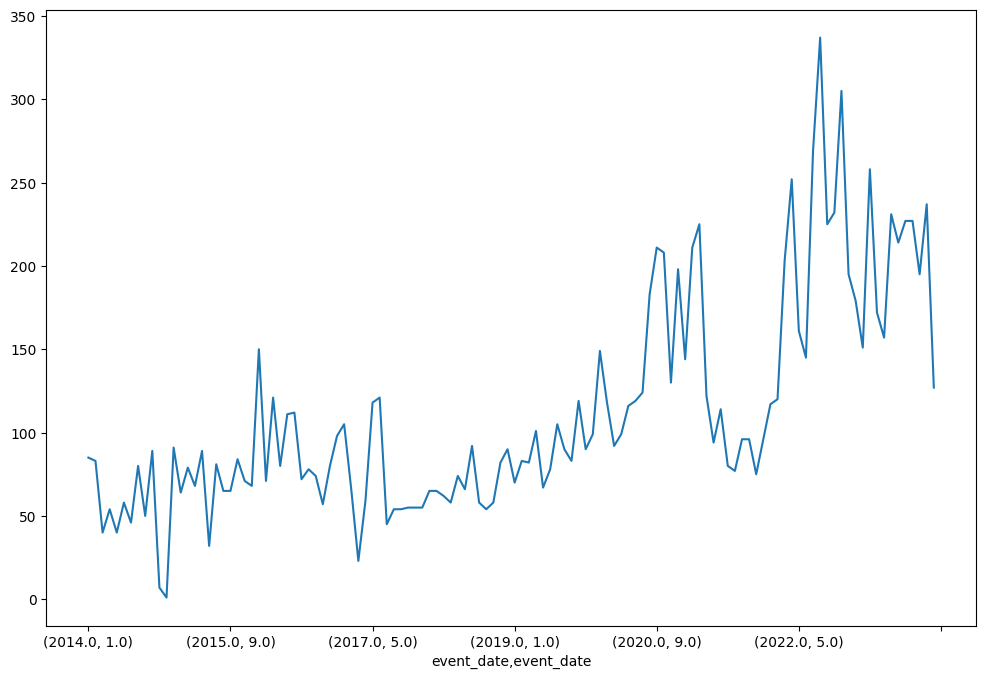

In [36]:
(
    df
    .groupby([df['event_date'].dt.year, 
              df['event_date'].dt.month])
    ['slug'].count()
    .plot.line(figsize=(12, 8))  
)

To find out whether there has been an increase or decrease over time, we can then invoke pct_change, which tells us how much each month changed from the previous one. We can then sum those values, to find out the overall change from the start of the data set to the end:

In [37]:
(
    df
    .groupby([df['event_date'].dt.year, 
              df['event_date'].dt.month])
    ['slug'].count()
    .pct_change()
    .sum()
)

96.51171801875496

We get a 96% increase, meaning that it has nearly doubled in the decade during which CISSM has been tracking security incidents.